In [146]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [147]:
import numpy as np
import pandas as pd

In [148]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [149]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [150]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [151]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [152]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [153]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [154]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [155]:
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(max_date)

('2017-08-23',)


In [156]:
max_date = dt.date(2017, 8, 23)
max_date_less_365 = max_date - dt.timedelta(days=365)
print(max_date_less_365)

2016-08-23


In [157]:
precipitation = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >= max_date_less_365).\
                        order_by(Measurement.date).all()

precipitation_df = pd.DataFrame(precipitation)
#precipitation_df.head(2)
precipitation_df.set_index('date').head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


<function matplotlib.pyplot.show(*args, **kw)>

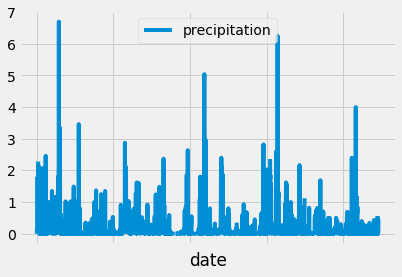

In [158]:
precipitation_df.plot('date', 'prcp')
plt.xlabel('date')
plt.legend(['precipitation'])
plt.show

In [159]:
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [160]:
stations = session.query(Measurement).group_by(Measurement.station).count()
print(stations)

9


In [161]:
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                        order_by (func.count(Measurement.tobs).desc()).all()
for station, count in active_stations:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [162]:
temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
            filter(Measurement.station == 'USC00519281').\
            filter(Measurement.date >= max_date_less_365).\
            order_by(Measurement.date).all()

temp_df = pd.DataFrame(temp)
temp_df.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


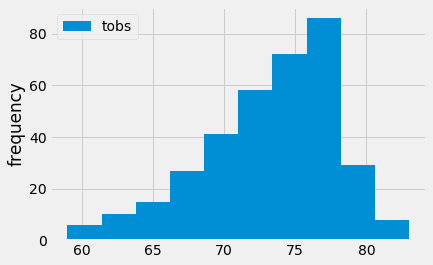

In [163]:
plt.hist(temp_df['tobs'])
plt.ylabel('frequency')
plt.legend(['tobs'])

# Exploratory Climate Analysis

In [164]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [165]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [166]:
# Design a query to show how many stations are available in this dataset?


In [167]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [168]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [169]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [170]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [171]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_trip = dt.date (2018, 7, 26)
end_trip = dt.date (2018, 7, 30)
prior_year_start = start_trip - dt.timedelta(days=365)
prior_year_end = end_trip - dt.timedelta(days=365)
last_year_temp = (calc_temps((prior_year_start), (prior_year_end)))
print(last_year_temp)


[(73.0, 79.21875, 84.0)]


<function matplotlib.pyplot.show(*args, **kw)>

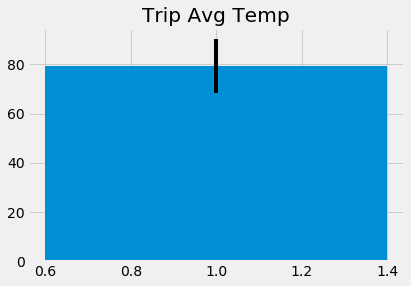

In [172]:
avg_temp = last_year_temp[0][1]
peak_to_peak = last_year_temp[0][2] - last_year_temp[0][0]
plt.bar(1, avg_temp, align='center', yerr=peak_to_peak)
plt.title('Trip Avg Temp')
plt.show

In [173]:
# Plot the results from your previous query as a bar chart.
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [176]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rain_weather_station = session.query(Measurement, Station).filter(Measurement.station == Station.station)
for row in rain_weather_station:
    print(row)

            #filter(Measurement.date >= prior_year_start).\
            #filter(Measurement.date <= prior_year_end).\
            #order_by(func.count(Measurement.prcp)).all()



(<sqlalchemy.ext.automap.measurement object at 0x0000025EC26F6EB8>, <sqlalchemy.ext.automap.station object at 0x0000025EC26F6F28>)
(<sqlalchemy.ext.automap.measurement object at 0x0000025EC26F6940>, <sqlalchemy.ext.automap.station object at 0x0000025EC26F6F28>)
(<sqlalchemy.ext.automap.measurement object at 0x0000025EC328D048>, <sqlalchemy.ext.automap.station object at 0x0000025EC26F6F28>)
(<sqlalchemy.ext.automap.measurement object at 0x0000025EC328D0B8>, <sqlalchemy.ext.automap.station object at 0x0000025EC26F6F28>)
(<sqlalchemy.ext.automap.measurement object at 0x0000025EC328D128>, <sqlalchemy.ext.automap.station object at 0x0000025EC26F6F28>)
(<sqlalchemy.ext.automap.measurement object at 0x0000025EC328D1D0>, <sqlalchemy.ext.automap.station object at 0x0000025EC26F6F28>)
(<sqlalchemy.ext.automap.measurement object at 0x0000025EC328D278>, <sqlalchemy.ext.automap.station object at 0x0000025EC26F6F28>)
(<sqlalchemy.ext.automap.measurement object at 0x0000025EC328D320>, <sqlalchemy.ext

In [175]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


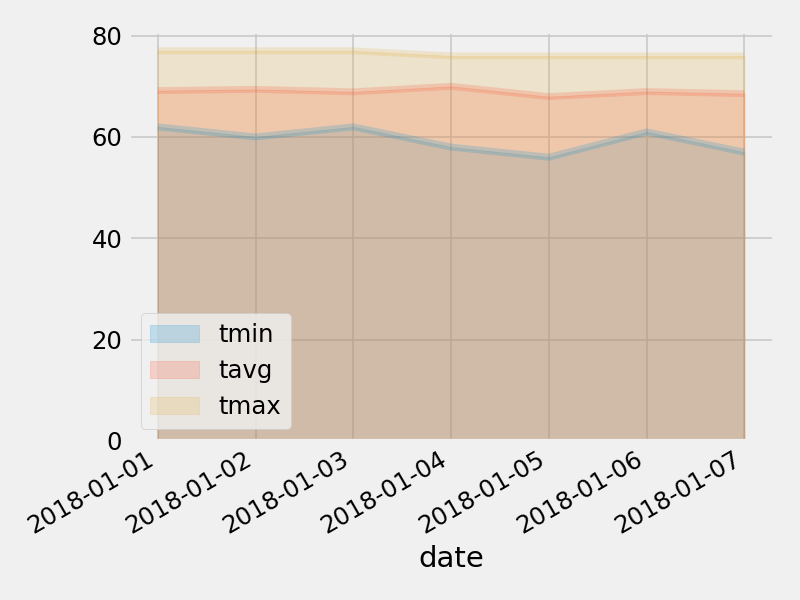

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
